Ce notebook contient des cellules de texte au format [Markdown](http://nbviewer.jupyter.org/github/ipython/ipython/blob/3.x/examples/Notebook/Working%20With%20Markdown%20Cells.ipynb), et des cellules de code en langage Python. Pour exécuter une cellule de code, cliquez dans la cellule puis tapez `Ctrl-Entrée`. Exécutez les cellules **dans l'ordre de lecture du document** pour être certain que les importations et déclarations se font correctement.

# BE1: Introduction à la Programmation Linéaire en Nombres Entiers (PLNE)

La programmation linéaire a été présentée dans le tronc commun de 1A comme un cas particulier d'optimisation sous contraintes (voir les diapos du cours sur LMS). Nous avons vu comment exploiter les propriétés du problème pour réduire l'espace de recherche et présenté l'algorithme du simplexe (Dantzig, 1947). En pratique, cet algorithme est très performant (ses évolutions sont d'ailleurs toujours utilisées dans les solveurs), mais ce n'est que 30 ans après sa découverte qu'on a pu trouver un algorithme polynomial pour résoudre la programmation linéaire: la méthode de l'ellipsoïde (Kachiyan, 1979). La programmation linéaire est donc un problème polynomial. Depuis, d'autres algorithmes polynomiaux ont été élaborés pour résoudre la programmation linéaire, et sont présents dans les solveurs aux côtés de l'algorithme du simplexe.

Lorsqu'on introduit des variables entières dans le problème, on perd les propriétés de continuité de l'ensemble des solutions et on bascule dans les problèmes dits combinatoires. Sauf cas particuliers, ces problèmes sont NP-difficiles et la façon de les modéliser et les résoudre prend une grande importance, du fait du nombre de solutions. Le présent BE a pour objectif de présenter la modélisation PLNE et d'illustrer les liens avec la PL, puis de montrer sur deux exemples comment on modélise un problème d'optimisation combinatoire en PLNE.

<div class="alert alert-warning">
Exécutez le code ci-dessous pour importer les bibliothèques nécessaires: cliquez dans la cellule de code puis faites Control-Entrée
</div>

In [2]:
# Imports: for all the notebook
%matplotlib inline
from lp_visu_notebook import LPVisu
import math
import numpy as np
import numpy.linalg as npla
from scipy.optimize import linprog

#!pip install pyscipopt # Ligne à enlever si vous utilisez Anaconda


## 1. Un premier exemple

Soit le problème de programmation linéaire en nombre entiers suivant:

\begin{alignat*}{3}
(\mathcal{P}1)\qquad\qquad \max z= 19x_1 &+20x_2 &&\\
\text{sous les contraintes}& &&\\
15x_1 &+17x_2 &&\leq 72 &&\qquad (1)\\
& x_j \in \mathbb{N} \quad && j = 1,2 &&\qquad (2).
\end{alignat*}


<div class="alert alert-warning">
Exécutez le code ci-dessous sans le modifier. La fonction `LPVisu()` permet de tracer l'ensemble $X1$ des solutions admissibles de $(\mathcal{P}1)$. Ce sont les points de coordonnées entières qui vérifient les contraintes (1) et (2) du problème.
</div>

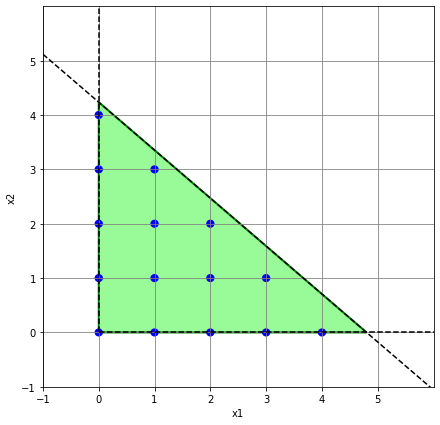

In [3]:
# Définition du problème
A = [[15.0, 17.0]]
b = [72.0]
c = np.array([19.0, 20.0])

# Bornes des variables
x1_bounds     = (0, None)
x2_bounds     = (0, None)

# Zone d'affichage
x1_gui_bounds = (-1, 6)
x2_gui_bounds = (-1, 6)

visu = LPVisu(A, b, c,
              x1_bounds, x2_bounds,
              x1_gui_bounds, x2_gui_bounds,integers=True)


Notons $(\mathcal{P}1_R)$ la *relaxation linéaire* de $(\mathcal{P}1)$ où nous transformons les contraintes (2) d'intégrité des variables, $x_j\in \mathbb{N}$, par des contraintes de non négativité $x_j \geq 0$. Le problème $(\mathcal{P}1_R)$ est donc un problème de programmation linéaire.

On dénomme $X1_R$ l'ensemble des solutions admissibles de $(\mathcal{P}1_R)$. C'est le polyèdre vert sur la figure ci-dessus. Il est continu. $X1$, ensemble des solutions admissibles de $(\mathcal{P}1)$, est discret et correspond aux points bleus sur la même figure.

Pour résoudre $(\mathcal{P}1_R)$ qui est un problème de programmation linéaire, nous allons utiliser la fonction `linprog()` de Scipy. Pour plus de détails sur cette fonction, consulter la [documentation](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html).

In [4]:
res = linprog(-c, A_ub=A, b_ub=b, bounds = (x1_bounds, x2_bounds),
              method='simplex')
print(res)

     con: array([], dtype=float64)
     fun: -91.2
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0.])
  status: 0
 success: True
       x: array([4.8, 0. ])


<div class="alert alert-danger">

**Réponse**:

   > Sommet optimal $x_R^*$: (4,8 ; 0)
   
   > Optimum $z_R^*$: 91,2
<div>

<div class="alert alert-warning">
L'argument `obj` de `LPVisu()` permet de tracer l'ensemble des points $x$ ayant la même valeur de fonction objectif $z_R=c^Tx$. On l'utilise pour visualiser l'optimum. 
    
Exécutez le code ci-dessous sans le modifier.
</div>

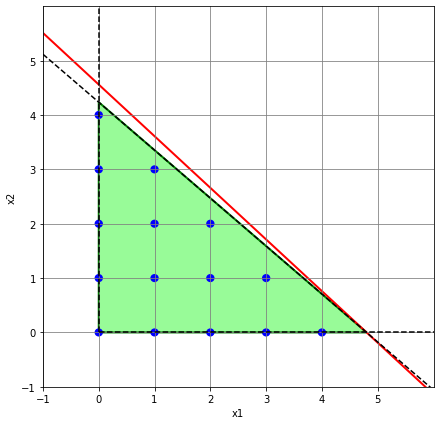

In [5]:
zR=-res.fun

visu = LPVisu(A, b, c,
              x1_bounds, x2_bounds,
              x1_gui_bounds, x2_gui_bounds,
              integers=True,
              obj=zR)

Nous allons maintenant résoudre "manuellement" le problème initial ($\mathcal{P1}$). Pour cela nous cherchons une solution admissible $x \in X1$ qui maximise $19x_1+20x_2$.

<div class="alert alert-warning">
Changer la valeur de `z` de manière à trouver la meilleure solution admissible de ($\mathcal{P}1$).
<div>

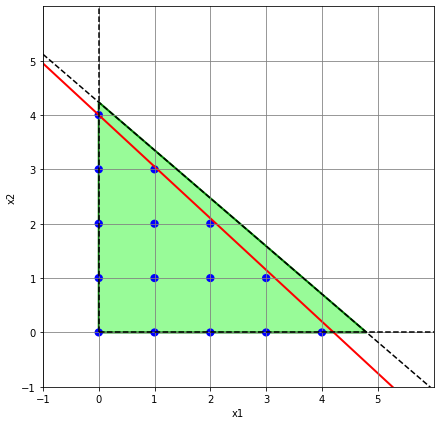

In [6]:
z=80
visu = LPVisu(A, b, c,
              x1_bounds, x2_bounds,
              x1_gui_bounds, x2_gui_bounds,
              integers=True,
              obj=z)

<div class="alert alert-danger">

**Résultat:**
   > Sommet optimal $x^*$: (0;4)
   
   > Optimum $z^*$:80
<div>

<div class="alert alert-danger">

**Commentaires:** pas de commentaire
<div>

## 2. Formulation idéale

Soit le problème de PLNE suivant:
\begin{alignat*}{3}
(\mathcal{P}2)\qquad\qquad \max z= x_1 &+2x_2 &&\\
\text{sous les contraintes}& &&\\
4&x_1 +\phantom{4}&&x_2 \leq 28 &&\qquad (1)\\
&x_1 +4&&x_2 \leq 27 &&\qquad (2)\\
&x_1 -&&x_2 \leq \phantom{2}2 &&\qquad (3)\\
& x_j \in \mathbb{N}  && \ \ j = 1,2 && \qquad (4).
\end{alignat*}

Notons $(\mathcal{P}2_R)$ la *relaxation linéaire* de $(\mathcal{P}2)$ où nous transformons les contraintes (4) d'intégrité des variables, $x_j\in \mathbb{N}$, par des contraintes de non négativité $x_j \geq 0$. Les ensembles $X2$ et $X2_R$ contiennent les solutions admissibles de $(\mathcal{P}2)$ et $(\mathcal{P}2_R)$, respectivement.
$$X2 \subseteq X2_R$$

Exécuter le code ci-dessous pour résoudre la relaxation linéaire $(\mathcal{P}2_R)$.

     con: array([], dtype=float64)
     fun: -16.333333333333336
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([ 0.00000000e+00, -3.55271368e-15,  1.66666667e+00])
  status: 0
 success: True
       x: array([5.66666667, 5.33333333])


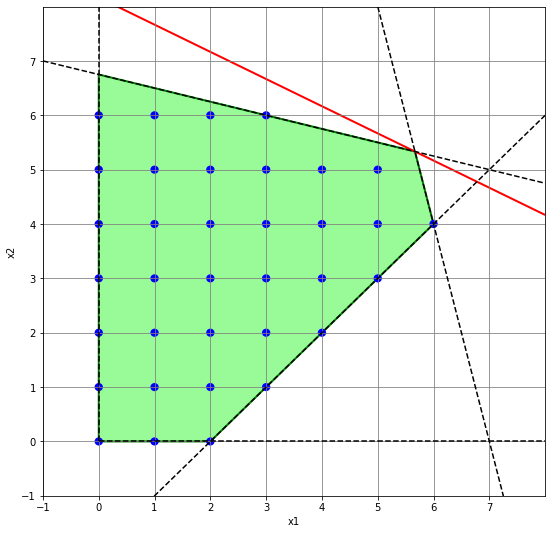

In [7]:
# Définition du problème
A = [[4.0, 1.0], [1.0, 4.0], [1.0, -1.0]]
b = [28.0, 27.0, 2.0]
c = np.array([1.0, 2.0])

# Bornes des variables
x1_bounds     = (0, None)
x2_bounds     = (0, None)

# Zone d'affichage
x1_gui_bounds = (-1, 8)
x2_gui_bounds = (-1, 8)

res = linprog(-c, A_ub=A, b_ub=b, 
              bounds = (x1_bounds, x2_bounds),
              method='simplex')
print(res)

visu = LPVisu(A, b, c,
              x1_bounds, x2_bounds,
              x1_gui_bounds, x2_gui_bounds,
              integers=True,
              obj=-res.fun)

<div class="alert alert-danger">

**Résultat:**
   > Sommet optimal $x_R^*$: [ 5.667e+00  5.333e+00]
   
   > Optimum $z_R^*$:  -16.333333333333336
<div>

Remarquons que la solution optimale de $(\mathcal{P}2_R)$ est située sur un sommet de $X2_R$ pour lequel les variables $x_1$ et $x_2$ ne sont pas entières. Ce n'est donc pas une solution admissible de $(\mathcal{P}2)$.

Afin de résoudre $(\mathcal{P}2)$, nous souhaitons trouver une nouvelle formulation $(\mathcal{P}'2)$ ayant le même ensemble de solutions admissibles $X'2=X2$ et telle que la résolution de sa relaxation linéaire donne une solution optimale entière. Pour cela, considérons l'enveloppe convexe des solutions de $(\mathcal{P}2)$. Comme $X2_R$ est un polyèdre convexe et que les points de $X2$ appartiennent à $X2_R$, on a 
$$X2 \subseteq CONV(X2) \subseteq X2_R$$

De plus, la solution optimale de $(\mathcal{P}2_R)$ n'étant pas entière,
$$CONV(X2) \subset X2_R$$

Ainsi, de manière à résoudre $(\mathcal{P}2)$, nous souhaitons trouver une nouvelle formulation $(\mathcal{P}'2)$ de ce problème telle que 
$$CONV(X2) = X'2_R$$
La résolution de $(\mathcal{P}'2_R)$ donnera une solution entière, et ce quel que soit la fonction objectif, car tous les sommets du polyèdre sont entiers. L'optimum de la relaxation et celle de $(\mathcal{P}2)$ sont confondus. Une telle formulation est appelée *formulation idéale*.


<div class="alert alert-warning">
Proposer une formulation idéale de $(\mathcal{P}2)$ et la résoudre
<div>


En énumérant tous les points entiers $(x_1,x_2)$ satisfaisant les contraintes initiales, on obtient les sommets du convexe suivant :
\[
(0,0),\ (2,0),\ (6,4),\ (5,5),\ (3,6),\ (0,6)
\]

Ces points définissent les inégalités de l’enveloppe convexe :

\
\begin{cases}
x_1 \ge 0\\
x_2 \ge 0\\
x_1 - x_2 \le 2\\
x_1 + x_2 \le 10\\
x_1 + 2x_2 \le 15\\
x_2 \le 6
\end{cases}
\


\
(\mathcal{P}'2)\quad
\begin{cases}
\max z = x_1 + 2x_2\\[4pt]
\text{sous contraintes :}\\[3pt]
x_1 \ge 0\\
x_2 \ge 0\\
x_1 - x_2 \le 2\\
x_1 + x_2 \le 10\\
x_1 + 2x_2 \le 15\\
x_2 \le 6\\
x_1, x_2 \in \mathbb{N}
\end{cases}
\


     con: array([], dtype=float64)
     fun: -15.0
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([5., 1., 0., 0.])
  status: 0
 success: True
       x: array([3., 6.])


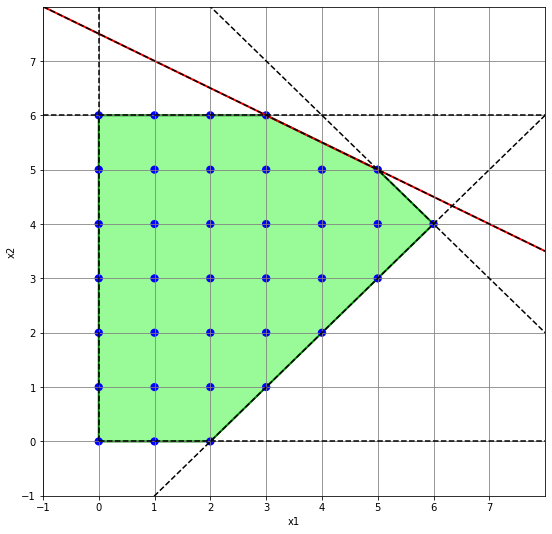

In [8]:
### Votre code
# Définition du problème
A = [[1.0, -1.0], [1.0, 1.0], [1.0, 2.0], [0 , 1]]
b = [2, 10, 15.0, 6]
c = np.array([1.0, 2.0])

# Bornes des variables
x1_bounds     = (0, None)
x2_bounds     = (0, None)

# Zone d'affichage
x1_gui_bounds = (-1, 8)
x2_gui_bounds = (-1, 8)

res = linprog(-c, A_ub=A, b_ub=b, 
              bounds = (x1_bounds, x2_bounds),
              method='simplex')
print(res)

visu = LPVisu(A, b, c,
              x1_bounds, x2_bounds,
              x1_gui_bounds, x2_gui_bounds,
              integers=True,
              obj=-res.fun)


<div class="alert alert-danger">

**Résultat:**
   > Sommet optimal $x$:  [ 3.000e+00  6.000e+00]
   
   > Optimum $z^*$:  15
<div>

<div class="alert alert-danger">

**Commentaires:**  pas de commentaire

<div>

# 3. Modélisation en PLNE d'un problème d'optimisation
La bibliothèque open source [PuLP](https://pythonhosted.org/PuLP/index.html) permet de décrire des problèmes d'optimisation en langage Python et les résoudre en faisant appel à des solveurs PL et PLNE. Elle génère des fichiers d'entrée pour différents solveurs comme COIN, GLPK, CPLEX ou GUROBI. Les cellules ci-dessous présentent la façon de modéliser l'exemple de la section 2 avec PuLP.

In [9]:
#import SCIP
from pyscipopt import Model, quicksum, multidict

# problem definition
A = [[4.0, 1.0], [1.0, 4.0], [1.0, -1.0]]
b = [28.0, 27.0, 2.0]
c = [1.0, 2.0]
m,n = np.array(A).shape

### Programmation linéaire

Exécutez le code ci-dessous sans le modifier

In [10]:
# New problem 
mdl = Model("example")


# Decision variables
x = np.empty((n), dtype=object)
for j in range(n):
    x[j] = mdl.addVar(vtype="C", name="x" )



# Constraints
for i in range(m):
    mdl.addCons(quicksum(A[i][j]*x[j] for j in range(n))  <= b[i])
    
# Objective function
mdl.setObjective(quicksum(c[j]*x[j] for j in range(n)), "maximize")


# Problem solving
#mdl.printStatistics()
#mdl.hideOutput()
mdl.optimize()

mdl.printSol()

print("Optimal value:", mdl.getObjVal())


Optimal value: 16.333333333333332
feasible solution found by trivial heuristic after 0.0 seconds, objective value 0.000000e+00
presolving:
(round 1, fast)       0 del vars, 0 del conss, 0 add conss, 3 chg bounds, 0 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 0 clqs
   (0.0s) symmetry computation started: requiring (bin +, int +, cont +), (fixed: bin -, int -, cont -)
   (0.0s) no symmetry present (symcode time: 0.00)
presolving (2 rounds: 2 fast, 1 medium, 1 exhaustive):
 0 deleted vars, 0 deleted constraints, 0 added constraints, 3 tightened bounds, 0 added holes, 0 changed sides, 0 changed coefficients
 0 implications, 0 cliques
presolved problem has 2 variables (0 bin, 0 int, 0 impl, 2 cont) and 3 constraints
      3 constraints of type <linear>
Presolving Time: 0.00
transformed 1/1 original solutions to the transformed problem space

 time | node  | left  |LP iter|LP it/n|mem/heur|mdpt |vars |cons |rows |cuts |sepa|confs|strbr|  dualbound   | primalbound  |  gap   | compl. 
* 0

### Programmation linéaire en nombres entiers
Pour passer en nombres entiers, il suffit de changer la catégorie des variables

In [11]:
# New problem 
mdl = Model("example")


# Decision variables
x = np.empty((n), dtype=object)
for j in range(n):
    x[j] = mdl.addVar(vtype="I", name="x" )



# Constraints
for i in range(m):
    mdl.addCons(quicksum(A[i][j]*x[j] for j in range(n))  <= b[i])
    
# Objective function
mdl.setObjective(quicksum(c[j]*x[j] for j in range(n)), "maximize")


# Problem solving
#mdl.printStatistics()
#mdl.hideOutput()
mdl.optimize()

mdl.printSol()

print("Optimal value:", mdl.getObjVal())


Optimal value: 15.0
feasible solution found by trivial heuristic after 0.0 seconds, objective value 0.000000e+00
presolving:
(round 1, fast)       0 del vars, 0 del conss, 0 add conss, 3 chg bounds, 0 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 0 clqs
(round 2, fast)       0 del vars, 0 del conss, 0 add conss, 4 chg bounds, 0 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 0 clqs
(round 3, exhaustive) 0 del vars, 0 del conss, 0 add conss, 4 chg bounds, 0 chg sides, 0 chg coeffs, 3 upgd conss, 0 impls, 0 clqs
   (0.0s) symmetry computation started: requiring (bin +, int +, cont +), (fixed: bin -, int -, cont -)
   (0.0s) no symmetry present (symcode time: 0.00)
presolving (4 rounds: 4 fast, 2 medium, 2 exhaustive):
 0 deleted vars, 0 deleted constraints, 0 added constraints, 4 tightened bounds, 0 added holes, 0 changed sides, 0 changed coefficients
 0 implications, 0 cliques
presolved problem has 2 variables (0 bin, 2 int, 0 impl, 0 cont) and 3 constraints
      3 constraints of typ

## 3.1 Problème d'affectation

Le *problème d'affectation* est un problème classique d'optimisation combinatoire dans lequel on cherche à affecter de manière optimale $n$ candidats à $n$ postes. Pour chaque couple (candidat, poste) on dispose d'une mesure de l'intérêt de cette association. L'objectif est de trouver l'affectation globale des candidats aux postes qui maximise l'intérêt.

<div class="alert alert-warning">

Combien y a-t-il de solutions à un problème d'affectation à $n$ candidats et $n$ postes ?
<div>

<div class="alert alert-danger">

**Réponse:** n factorielle
<div>

#### Modélisation
Nous allons utiliser des variables binaires pour représenter l'affectation du candidat $i$ au poste $j$. Les contraintes doivent garantir qu'il y a un et un seul candidat affecté à chaque poste.

<div class="alert alert-warning">

Modélisez le problème d'affectation et résolvez-le avec PuLP.  
Affichez le résultat: valeur de la fonction objectif et des variables binaires.
<div>

**Modèle:**  

### Fonction objectif
Maximiser la somme totale des intérêts :
$$
max \; Z = \sum_{i \in I} \sum_{j \in J} c_{ij} \, x_{ij}
$$

1. **Chaque candidat est affecté à exactement un poste :**
$$
\forall i \in I, \quad \sum_{j \in J} x_{ij} = 1
$$

2. **Chaque poste reçoit exactement un candidat :**
$$
\forall j \in J, \quad \sum_{i \in I} x_{ij} = 1
$$

3. **Nature des variables :**
$$
x_{ij} \in \{0,1\}, \quad \forall i \in I, \; j \in J
$$


In [12]:
C = np.array([
    [8,  6,  7,  8,  9],
    [11, 7,  5,  8, 10],
    [8, 10, 9, 11, 6],
    [10, 9,  7,  8,  7],
    [11, 6,  9,  7,  8]
])

m, n = C.shape  


mdl = Model("Assignment")

# Variables binaires x[i][j] = 1 si candidat i affecté au poste j
x = np.empty((m, n), dtype=object)
for i in range(m):
    for j in range(n):
        x[i][j] = mdl.addVar(vtype="B", name=f"x({i},{j})")

for i in range(m):
    mdl.addCons(quicksum(x[i][j] for j in range(n)) == 1, name=f"OneJobPerCandidate({i})")

for j in range(n):
    mdl.addCons(quicksum(x[i][j] for i in range(m)) == 1, name=f"OneCandidatePerJob({j})")

mdl.setObjective(
    quicksum(C[i][j] * x[i][j] for i in range(m) for j in range(n)),
    "maximize"
)

mdl.optimize()


print("Résultats du problème d'affectation ")
mdl.printSol()
print("Valeur optimale :", mdl.getObjVal())



Résultats du problème d'affectation 
Valeur optimale : 49.0
presolving:
(round 1, exhaustive) 0 del vars, 0 del conss, 0 add conss, 0 chg bounds, 0 chg sides, 0 chg coeffs, 10 upgd conss, 0 impls, 10 clqs
   (0.0s) probing cycle finished: starting next cycle
   (0.0s) symmetry computation started: requiring (bin +, int +, cont +), (fixed: bin -, int -, cont -)
   (0.0s) no symmetry present (symcode time: 0.00)
presolving (2 rounds: 2 fast, 2 medium, 2 exhaustive):
 0 deleted vars, 0 deleted constraints, 0 added constraints, 0 tightened bounds, 0 added holes, 0 changed sides, 0 changed coefficients
 0 implications, 10 cliques
presolved problem has 25 variables (25 bin, 0 int, 0 impl, 0 cont) and 10 constraints
     10 constraints of type <setppc>
transformed objective value is always integral (scale: 1)
Presolving Time: 0.00

 time | node  | left  |LP iter|LP it/n|mem/heur|mdpt |vars |cons |rows |cuts |sepa|confs|strbr|  dualbound   | primalbound  |  gap   | compl. 
p 0.0s|     1 |     

<div class="alert alert-warning">
Modifiez votre modèle pour résoudre la relaxation linéaire du problème.  
Affichez le résultat et comparez-le au précédent: valeur de la fonction objectif et des variables binaires.
<div>

In [13]:
# Votre code:
C = np.array([
    [8,  6,  7,  8,  9],
    [11, 7,  5,  8, 10],
    [8, 10, 9, 11, 6],
    [10, 9,  7,  8,  7],
    [11, 6,  9,  7,  8]
])

m, n = C.shape  


mdl = Model("Assignment")

# Variables binaires x[i][j] = 1 si candidat i affecté au poste j
x = np.empty((m, n), dtype=object)
for i in range(m):
    for j in range(n):
        x[i][j] = mdl.addVar(vtype="C", name=f"x({i},{j})")

for i in range(m):
    mdl.addCons(quicksum(x[i][j] for j in range(n)) == 1, name=f"OneJobPerCandidate({i})")

for j in range(n):
    mdl.addCons(quicksum(x[i][j] for i in range(m)) == 1, name=f"OneCandidatePerJob({j})")

mdl.setObjective(
    quicksum(C[i][j] * x[i][j] for i in range(m) for j in range(n)),
    "maximize"
)

mdl.optimize()


print("Résultats du problème d'affectation ")
mdl.printSol()
print("Valeur optimale :", mdl.getObjVal())



Résultats du problème d'affectation 
Valeur optimale : 49.0
presolving:
(round 1, fast)       0 del vars, 0 del conss, 0 add conss, 25 chg bounds, 0 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 0 clqs
   (0.0s) symmetry computation started: requiring (bin +, int +, cont +), (fixed: bin -, int -, cont -)
   (0.0s) no symmetry present (symcode time: 0.00)
presolving (2 rounds: 2 fast, 1 medium, 1 exhaustive):
 0 deleted vars, 0 deleted constraints, 0 added constraints, 25 tightened bounds, 0 added holes, 0 changed sides, 0 changed coefficients
 0 implications, 0 cliques
presolved problem has 25 variables (0 bin, 0 int, 0 impl, 25 cont) and 10 constraints
     10 constraints of type <linear>
Presolving Time: 0.00

 time | node  | left  |LP iter|LP it/n|mem/heur|mdpt |vars |cons |rows |cuts |sepa|confs|strbr|  dualbound   | primalbound  |  gap   | compl. 
* 0.0s|     1 |     0 |    10 |     - |    LP  |   0 |  25 |  10 |  10 |   0 |  0 |   0 |   0 | 4.900000e+01 | 4.900000e+01 |   0.00%

<div class="alert alert-danger">

**Commentaires:** no comment 
<div>

## 3.2 Planification de la production d'électricité

Ce problème, appelé *unit commitment* en anglais, consiste à déterminer à chaque pas de temps la production d'un ensemble de centrales (ou unités) afin de fournir une demande électrique donnée. Il est contraint par les bornes min/max de production des centrales et d'autres contraintes de fonctionnement. L'objectif est de satisfaire la demande avec un coût de production le plus faible possible.

Considérons une société de production d'électricité qui opère deux centrales ayant les caractéristiques suivantes:
<ul>
<li> Centrale 1: puissance fournie située entre 50 et 400 MW, coût de production 20 €/MWH
<li> Centrale 2: puissance fournie située entre 20 et 200 MW, coût de production 40 €/MWH
</ul>

Les deux centrales doivent produire de l'électricité pour satisfaire la demande donnée dans le fichier `demande.txt`. Il représente, heure par heure, la demande d'une semaine.


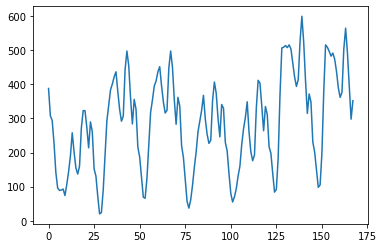

In [14]:
# Données du problème
demande = np.loadtxt("demande.txt")
couts_var = np.array([20, 40])
puissance_max = np.array([400, 200])
puissance_min = np.array([50, 20])

import matplotlib.pyplot as plt
plt.plot(demande)

### Modélisation sur un pas de temps
On s'intéresse à la production d'une centrale 'c' sur un pas de temps 't' donné. Notons 'prod[t,c]' la variable qui désigne cette production. elle doit prendre les valeurs suivantes:
   > 0 si la centrale est arrêtée
   
   > une valeur située dans l'intervale [puissance_min[c], puissance_max[c]] sinon 

<div class="alert alert-warning">

Ecrivez les contraintes linéaires permettant de modéliser ce comportement.  
Si nécessaire, introduisez de nouvelles variables.
<div>

<div class="alert alert-danger">

**Modèle:**
<div>
    
  - Introduire une variable binaire u[t,c] : 1 si la centrale c est en marche à l’heure t, 0 si elle est arrêtée.
- La production prod[t,c] doit respecter :
    - Si u[t,c] = 0 alors prod[t,c] = 0
    - Si u[t,c] = 1 alors prod[t,c] est comprise entre puissance_min[c] et puissance_max[c]

donc
    
    
1. prod[t,c] >= puissance_min[c] * u[t,c]
2. prod[t,c] <= puissance_max[c] * u[t,c]

### Modélisation des contraintes de fonctionnement
Les centrales ont une contrainte supplémentaire: lorsqu'elles produisent, elles doivent être en fonctionnement au minimum 2 heures d'affilée avant de pouvoir s'arrêter.

<div class="alert alert-warning">

Ecrivez les contraintes linéaires permettant de modéliser ce comportement.  
<div>

<div class="alert alert-danger">

**Modèle:**
<div>
    Modèle :

- Soit u[t,c] la variable binaire indiquant si la centrale c est en marche à l’heure t (1 = marche, 0 = arrêt).
- Pour garantir que la centrale reste au moins 2 heures consécutives lorsqu'elle démarre :
    - Pour chaque heure t > 0 : si u[t,c] - u[t-1,c] = 1 (démarrage à l’heure t), alors u[t+1,c] doit être égal à 1.
- En inégalité linéaire : 
    u[t,c] - u[t-1,c] <= u[t+1,c]

### Modélisation avec PuLP

<div class="alert alert-warning">

Ecrivez le modèle complet avec PuLP et résolvez-le.  
Tracez le graphique de production des centrales à l'optimum.
<div>

<div class="alert alert-danger">

**Modèle:**
<div>

presolving:
(round 1, fast)       2 del vars, 1 del conss, 0 add conss, 493 chg bounds, 0 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 0 clqs
(round 2, fast)       260 del vars, 583 del conss, 0 add conss, 650 chg bounds, 24 chg sides, 24 chg coeffs, 0 upgd conss, 0 impls, 1 clqs
(round 3, fast)       354 del vars, 731 del conss, 0 add conss, 674 chg bounds, 24 chg sides, 24 chg coeffs, 0 upgd conss, 0 impls, 1 clqs
(round 4, fast)       363 del vars, 736 del conss, 0 add conss, 674 chg bounds, 24 chg sides, 24 chg coeffs, 0 upgd conss, 0 impls, 1 clqs
(round 5, fast)       366 del vars, 737 del conss, 0 add conss, 674 chg bounds, 24 chg sides, 24 chg coeffs, 0 upgd conss, 0 impls, 1 clqs
(round 6, fast)       368 del vars, 737 del conss, 0 add conss, 800 chg bounds, 24 chg sides, 24 chg coeffs, 0 upgd conss, 0 impls, 1 clqs
(round 7, fast)       393 del vars, 770 del conss, 0 add conss, 800 chg bounds, 24 chg sides, 125 chg coeffs, 0 upgd conss, 0 impls, 1 clqs
(round 8, fast)     

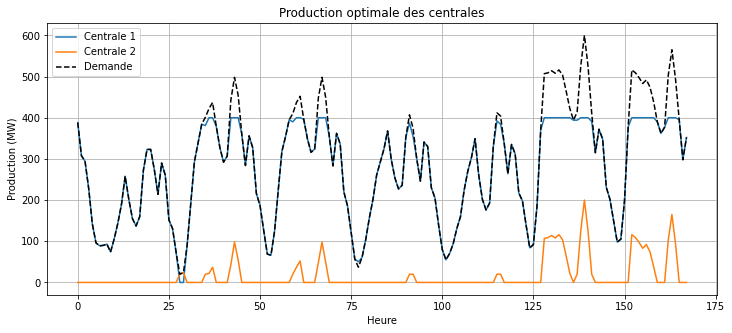

In [16]:
# Votre code
# Données
demande = np.loadtxt("demande.txt")  # T heures
T = len(demande)
couts_var = np.array([20, 40])
puissance_min = np.array([50, 20])
puissance_max = np.array([400, 200])
C = len(couts_var)  # nombre de centrales

# Création du modèle
mdl = Model("UnitCommitment")

# Variables de production continue
prod = {}
# Variables binaires pour état marche/arrêt
u = {}
for t in range(T):
    for c in range(C):
        prod[t,c] = mdl.addVar(vtype="C", name=f"prod_{t}_{c}")
        u[t,c] = mdl.addVar(vtype="B", name=f"u_{t}_{c}")

# Contraintes : production si marche
for t in range(T):
    for c in range(C):
        mdl.addCons(prod[t,c] >= puissance_min[c] * u[t,c])
        mdl.addCons(prod[t,c] <= puissance_max[c] * u[t,c])

# Contraintes : satisfaction de la demande
for t in range(T):
    mdl.addCons(quicksum(prod[t,c] for c in range(C)) >= demande[t])

# Contraintes : continuité 2 heures
for t in range(1,T-1):  # t=1 à T-2
    for c in range(C):
        mdl.addCons(u[t,c] - u[t-1,c] <= u[t+1,c])


# Objectif : minimiser coût de production
mdl.setObjective(quicksum(couts_var[c] * prod[t,c] for t in range(T) for c in range(C)), "minimize")

# Résolution
mdl.optimize()

# Récupération des résultats
prod_opt = np.zeros((T,C))
for t in range(T):
    for c in range(C):
        prod_opt[t,c] = mdl.getVal(prod[t,c])

# Affichage graphique
plt.figure(figsize=(12,5))
for c in range(C):
    plt.plot(prod_opt[:,c], label=f"Centrale {c+1}")
plt.plot(demande, 'k--', label="Demande")
plt.xlabel("Heure")
plt.ylabel("Production (MW)")
plt.title("Production optimale des centrales")
plt.legend()
plt.grid(True)
plt.show()